In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import smerf
from smerf.models import *
from smerf.textbox_data import *
from smerf.eval import *
import smerf.explanations as saliency
import pickle
import os
import glob


# NOTE: set up cache directory for results containing real-background results
CACHE_DIR = '../outputs_bb/cache'
if not os.path.exists(CACHE_DIR):
    os.mkdir(CACHE_DIR)
    
PLOT_DIR = '../outputs_bb/plots'
if not os.path.exists(PLOT_DIR):
    os.mkdir(PLOT_DIR)
    
exp_no = 2.11
methods_name =  os.path.join(CACHE_DIR, 'methods_%0.2f.pkl'%exp_no)
methods = pickle.load(open(methods_name, 'rb'))
methods = [m[3] for m in methods][1:]

BASE_CACHE_DIR = '../ref/cache' # NOTE: set up cache directory for the original results (black background)

Using TensorFlow backend.


In [36]:
import glob
method_idx = [0, 1, 2, 3, 4, 6, 8, 11, 13, 14]
methods_sel = [methods[i] for i in method_idx]
methods_sel = [methods[i] for i in method_idx]
methods_sel = ['Gradient', 
'SmoothGrad',
 'Deconvnet',
 'GBP',
 'DeepTaylor',
 'IG',
 'LRP',
 'DeepLIFT',
 'Grad-CAM',
 'DeepSHAP',]
simple_case_nos = [1.11,2.11]
complex_case_nos = [1.2, 3.71, 3.72, 3.73, 3.74]

metric_type = 'weighted'
#metric_type = 'plain_single' # uncomment this line to get results for plain IOU
p_results = []
s_results = []
for s in simple_case_nos:
    bucket_results = sorted(glob.glob(os.path.join(CACHE_DIR, "metrics_%s_%0.2f_*.npy"%(metric_type, s))))
    ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
    for i in ids:
        d = np.load(os.path.join(CACHE_DIR, "metrics_%s_%0.2f_%d.npy"%(metric_type, s,i)))
        bucket_p, bucket_s = d[0], d[2]
        if not np.isnan(bucket_p[0]):
            p_results.append(bucket_p)
        if not np.isnan(bucket_s[0]):
            s_results.append(bucket_s)
p_results = np.array(p_results)
s_results = np.array(s_results)
simple_avg = np.mean(p_results, axis=0)
simple_min = np.min(p_results, axis=0)

p_results = []
s_results = []
for s in [1.2,3.71,3.72,3.73,3.74]:
    bucket_results = sorted(glob.glob(os.path.join(CACHE_DIR, "metrics_%s_%0.2f_*.npy"%(metric_type, s))))
    ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
    for i in ids:
        d = np.load(os.path.join(CACHE_DIR, "metrics_%s_%0.2f_%d.npy"%(metric_type, s,i)))
        bucket_p, bucket_s = d[0], d[2]
        if not np.isnan(bucket_p[0]):
            p_results.append(bucket_p)
        if not np.isnan(bucket_s[0]):
            s_results.append(bucket_s)
p_results = np.array(p_results)
s_results = np.array(s_results)
complex_avg = np.mean(p_results, axis=0)
complex_min = np.min(p_results, axis=0)
complex_avg = np.nan_to_num(complex_avg)
complex_min = np.nan_to_num(complex_min)

In [37]:
p_results = []
s_results = []
for s in simple_case_nos:
    bucket_results = sorted(glob.glob(os.path.join(BASE_CACHE_DIR, "metrics_%s_%0.2f_*.npy"%(metric_type, s))))
    ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
    for i in ids:
        d = np.load(os.path.join(BASE_CACHE_DIR, "metrics_%s_%0.2f_%d.npy"%(metric_type, s,i)))
        bucket_p, bucket_s = d[0], d[2]
        if not np.isnan(bucket_p[0]):
            p_results.append(bucket_p)
        if not np.isnan(bucket_s[0]):
            s_results.append(bucket_s)
p_results = np.array(p_results)
s_results = np.array(s_results)
simple_avg_base = np.mean(p_results, axis=0)
simple_min_base = np.min(p_results, axis=0)

p_results = []
s_results = []
for s in [1.2,3.72,3.73]:
    bucket_results = sorted(glob.glob(os.path.join(BASE_CACHE_DIR, "metrics_%s_%0.2f_*.npy"%(metric_type, s))))
    ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
    for i in ids:
        d = np.load(os.path.join(BASE_CACHE_DIR, "metrics_%s_%0.2f_%d.npy"%(metric_type, s,i)))
        bucket_p, bucket_s = d[0], d[2]
        if not np.isnan(bucket_p[0]):
            p_results.append(bucket_p)
        if not np.isnan(bucket_s[0]):
            s_results.append(bucket_s)
p_results = np.array(p_results)
s_results = np.array(s_results)
complex_avg_base = np.mean(p_results, axis=0)
complex_min_base = np.min(p_results, axis=0)
complex_avg_base = np.nan_to_num(complex_avg_base)
complex_min_base = np.nan_to_num(complex_min_base)

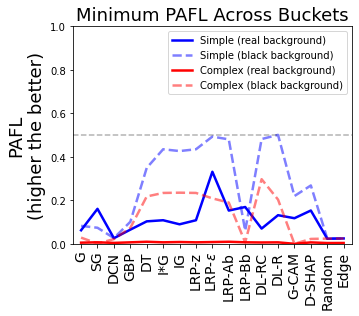

In [41]:
fig, axs = plt.subplots(1,1, figsize=(5,4))
axs.plot(simple_min, 'b-', label='Simple (real background)', linewidth=2.5)
axs.plot(simple_min_base, 'b--', alpha=0.5, label='Simple (black background)', linewidth=2.5)
axs.plot(complex_min, 'r-', label='Complex (real background)', linewidth=2.5)
axs.plot(complex_min_base, 'r--',  alpha=0.5,label='Complex (black background)', linewidth=2.5)
axs.set_ylim([0, 1.0])
# axs[0].set_ylim([0, 0.006])
#axs.set(xticks=range(len(methods)), xticklabels=methods)
#axs.set_xticklabels(methods, rotation=90, fontsize=18)
#axs.set_xticks(())
axs.set_xlim([-0.5, len(methods)-0.5])
if metric_type == 'plain_single':
    axs.set_title('Minimum PIOU Across Buckets', fontsize=18)
    axs.set_ylabel('IOU\n(higher the better)', fontsize=18)
elif metric_type == 'weighted':
    axs.set_title('Minimum PAFL Across Buckets', fontsize=18)
    axs.set_ylabel('PAFL\n(higher the better)', fontsize=18)
axs.legend()
axs.set_xticks(range(complex_min_base.shape[0]))

methods = [
    'G',
    'SG',
    'DCN',
    'GBP',
    'DT',
    'I*G',
    'IG',
    'LRP-z',
    'LRP-$\epsilon$',
    'LRP-Ab',
    'LRP-Bb',
    'DL-RC',
    'DL-R',
    'G-CAM',
    'D-SHAP',
    'Random',
    'Edge'
]
axs.plot([-1, len(methods)], [0.5,0.5], 'k--', alpha=0.3,  label='0.5 threshold')
axs.set_xticklabels(methods, rotation=90, fontsize=14)
plt.savefig(os.path.join(PLOT_DIR, 'comparison-bg-update.pdf'), dpi=200, bbox_inches='tight')

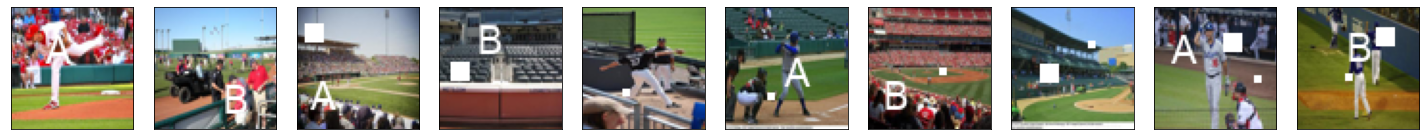

In [20]:
# plot some samples
results = pickle.load(open(os.path.join(CACHE_DIR, 'result_3.71.pkl'), 'rb'))
np.random.seed(42)
idx = np.random.choice(results.shape[0], 10)
idx = [0, 20, 40, 60, 80, 100, 120, 140, 160, 182]
f, axs = plt.subplots(1, 10,  figsize=(20,2))
for i, j in enumerate(idx):
    axs[i].imshow(results[j][0])
    axs[i].set_xticks(())
    axs[i].set_yticks(())
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, 'examples.pdf'), dpi=200)